In [1]:
from tfModelRNN import *

INFO:tensorflow:Restoring parameters from ../models/RNN/my_RNN_model_test


In [2]:
raw = Audio.getStream(sample_rate = 44100, chunk_size = 8192,chunk_num = 10, isWrite=True)
#raw,sr = librosa.load('../data/drone170719-002.wav', sr=22050)
dataX = extractFeature(raw)

#print(X_hot.shape)
y_pred = sess.run(tf.argmax(Y_pred,1), feed_dict={X:dataX, BatchSize: len(dataX)})

(81920,)
small end: (16, 9)


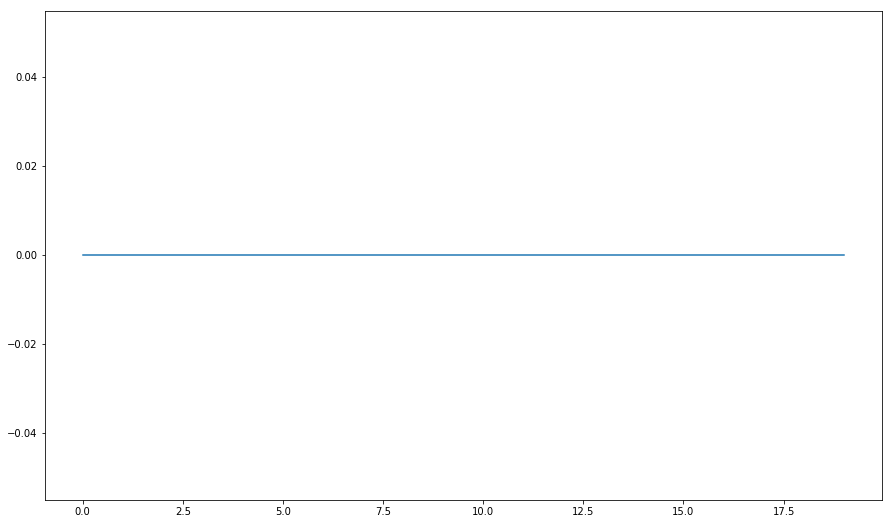

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
ax.plot(np.linspace(0,len(y_pred), len(y_pred)),y_pred)

## sudo pip3 install librosa==0.4.2
## pip3 install numpy
## pip3 install tensorflow

In [1]:
#install librosa 
from tfModelRNN import *
# 0: none
# 1: unloaded 
# 2: load 
while(True):
    y_pred = getDetectionResult()
    print('\t',y_pred)

INFO:tensorflow:Restoring parameters from ../models/RNN/my_RNN_model_test
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0
(8192,)
small end: (16, 9)
[0]
	 0


KeyboardInterrupt: 


Thanks @MatthewBerryman, you got me over the hump! On the newest Raspian release (stretch) I was successful with the following after several hours of frustration of trying to get librosa installed on Raspian jessie (which my RPi3 came with). Having said this, the following procedure may also work with jessie.

First, update your system's package list and upgrade all your installed packages to their latest versions with the command:

## sudo apt-get update
## sudo apt-get dist-upgrade
Install Python science stack:

## sudo pip3 install numpy --upgrade 
## sudo apt-get install python3-pandas
(Also seems to install matplotlib, scipy)

sudo apt-get install python3-sklearn
Then, install the low-level virtual machine, LLVM (per @MatthewBerryman, I used llvm 3.8 and llvmlite 0.15.0, and not the newest combination where I couldn't find the packages.) After installing llvm-3.8, a symbolic link needs to be defined before installing llvmlite.

## sudo apt-get install llvm-3.8
## sudo ln -s /usr/bin/llvm-config-3.8 /usr/bin/llvm-config
## sudo pip3 install llvmlite==0.15.0
## sudo pip3 install numba==0.32.0
Numba is 0.32.0 because if it's the newest (0.36), it will not import because of an llvm mismatch, and if it's a lower version, the librosa install will upgrade it to the newest version.

Finally, install librosa:

## sudo pip3 install librosa==0.4.2
However, when trying to import librosa, it still throws and error, namely

ImportError: libf77blas.so.3: cannot open shared object file: No such file or directory
Googling this error indicated this would fix it:

## sudo apt-get install libatlas-base-dev